Importing the Dependencies

In [270]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier  
import matplotlib.pyplot as plt

Data Collection & Analysis

In [271]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('transformed_data/without_Positive_Correlating_Attributes.csv')

In [ ]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

In [273]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 14)

In [274]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      195 non-null    int64  
 1   name            195 non-null    object 
 2   MDVP:Fo(Hz)     195 non-null    float64
 3   MDVP:Fhi(Hz)    195 non-null    float64
 4   MDVP:Flo(Hz)    195 non-null    float64
 5   MDVP:Jitter(%)  195 non-null    float64
 6   HNR             195 non-null    float64
 7   status          195 non-null    int64  
 8   RPDE            195 non-null    float64
 9   DFA             195 non-null    float64
 10  spread1         195 non-null    float64
 11  spread2         195 non-null    float64
 12  D2              195 non-null    float64
 13  PPE             195 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 21.5+ KB


In [275]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

Unnamed: 0        0
name              0
MDVP:Fo(Hz)       0
MDVP:Fhi(Hz)      0
MDVP:Flo(Hz)      0
MDVP:Jitter(%)    0
HNR               0
status            0
RPDE              0
DFA               0
spread1           0
spread2           0
D2                0
PPE               0
dtype: int64

In [276]:
# getting some statistical measures about the data
parkinsons_data.describe()

,Unnamed: 0,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,97.000000,154.228641,197.104918,116.324631,0.006220,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,56.435804,41.390065,91.491548,43.521413,0.004848,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,0.000000,88.333000,102.145000,65.476000,0.001680,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,48.500000,117.572000,134.862500,84.291000,0.003460,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,97.000000,148.790000,175.829000,104.315000,0.004940,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,145.500000,182.769000,224.205500,140.018500,0.007365,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,194.000000,260.105000,592.030000,239.170000,0.033160,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [277]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [278]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

C:\Users\RGIT HP100\AppData\Local\Temp\ipykernel_6432\4189017937.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


,Unnamed: 0,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,
0,113.500000,181.937771,223.636750,145.207292,0.003866,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,91.612245,145.180762,188.441463,106.893558,0.006989,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-Processing

Separating the features & Target

In [279]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']
# ----------------------------------#

In [280]:
print(X)

     Unnamed: 0  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0             0      119.992       157.302        74.997         0.00784   
1             1      122.400       148.650       113.819         0.00968   
2             2      116.682       131.111       111.555         0.01050   
3             3      116.676       137.871       111.366         0.00997   
4             4      116.014       141.781       110.655         0.01284   
..          ...          ...           ...           ...             ...   
190         190      174.188       230.978        94.261         0.00459   
191         191      209.516       253.017        89.488         0.00564   
192         192      174.688       240.005        74.287         0.01360   
193         193      198.764       396.961        74.904         0.00740   
194         194      214.289       260.277        77.973         0.00567   

        HNR      RPDE       DFA   spread1   spread2        D2       PPE  
0    21.033  

In [281]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [282]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [283]:
print(X.shape, X_train.shape, X_test.shape)

(195, 12) (156, 12) (39, 12)


Data Standardization

In [284]:
scaler = StandardScaler()

In [285]:
scaler.fit(X_train)

StandardScaler()

In [286]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [287]:
print(X_train)
#--------------------------------------#

[[ 0.43774931  0.63239631 -0.02731081 ... -0.97586547 -0.55160318
   0.07769494]
 [ 1.11207251 -1.05512719 -0.83337041 ...  0.3981808  -0.61014073
   0.39291782]
 [-0.09077428  0.02996187 -0.29531068 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.49172321 -0.9096785  -0.6637302  ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-1.53054543 -0.35977689  0.19731822 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.25787212  1.01957066  0.19922317 ... -0.716232    1.23632066
  -0.05829386]]


Model Training

Support Vector Machine Model

In [288]:
model = svm.SVC(kernel='linear')

In [289]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')





Model Evaluation

Accuracy Score

In [290]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [291]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8974358974358975


In [292]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [293]:
print('Accuracy score of test data : ', test_data_accuracy)
#--------------------------------------------------

Accuracy score of test data :  0.8717948717948718


Saving the model using pickle

In [294]:
import pickle
with open('model_svm.pkl','wb') as file:
    pickle.dump(model,file)

Loading model using pickle

In [295]:
import pickle
with open('model_svm.pkl','rb') as file:
    model_svm = pickle.load(file)

Building a Predictive System

In [296]:
#input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model_svm.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


C:\Users\RGIT HP100\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 22 features, but StandardScaler is expecting 12 features as input.

In [ ]:
len(input_data)

In [ ]:
input_data_as_numpy_array.shape

In [297]:
input_data_reshaped.shape

(1, 22)

# Trying logistic classifier

In [298]:
parkinsons_sys = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [299]:
X_test_prediction = parkinsons_sys.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.8205128205128205


# Trying kmeans

In [300]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X_train, Y_train)

In [301]:
X_test_prediction = kmeans.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.10256410256410256


# Logistics after PCA

In [302]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(X_train)
X_test_PCA=pca.transform(X_test)
print(X_train.shape)
print(X_PCA.shape)
print(X_test_PCA.shape)

(156, 12)
(156, 8)
(39, 8)


In [303]:
parkinsons_sys_pca = LogisticRegression(random_state=0).fit(X_PCA, Y_train)

In [304]:
X_test_prediction = parkinsons_sys_pca.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.7948717948717948


# SVM after PCA

In [305]:
svm_pca_model = svm.SVC(kernel='linear')
svm_pca_model.fit(X_PCA, Y_train)

SVC(kernel='linear')

In [306]:
X_test_prediction = svm_pca_model.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.8717948717948718


# kmeans after PCA

In [307]:
kmeans_pca = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(X_PCA, Y_train)

In [308]:
X_test_prediction = kmeans_pca.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy)

0.15384615384615385


In [309]:
print(pca.components_)

[[ 0.03420931 -0.17925416 -0.00851888 -0.2036704   0.34513924 -0.37337651
   0.32281456  0.05468001  0.42699308  0.33195531  0.29659476  0.42299803]
 [ 0.24185284  0.54242445  0.44790874  0.28087697  0.16944097 -0.20566049
  -0.0571208  -0.43881868 -0.04258794 -0.00938737  0.3128661  -0.03392158]
 [ 0.54051965 -0.24973666 -0.03519676 -0.45484788 -0.12762937 -0.02774184
   0.3189834  -0.4825368  -0.06529335 -0.20085972 -0.12593555 -0.15882712]
 [-0.54657232  0.00691872  0.47615183 -0.37763928 -0.28226715  0.26450507
   0.15516133 -0.26389177  0.00088349  0.29096923  0.05983954 -0.01681093]
 [ 0.22470969 -0.1996932   0.62174165 -0.25820072  0.28360936  0.09696347
  -0.40628667  0.29154501  0.09929267 -0.20540277 -0.21979045  0.12703224]
 [-0.44045205  0.07726016  0.01510226  0.08489396  0.40017326 -0.16323305
   0.30253198 -0.22820262  0.0441903  -0.47167401 -0.47767279  0.098039  ]
 [ 0.26041182 -0.11325695  0.26096991  0.48847657 -0.06704814  0.16930762
   0.39024121  0.06783442  0.039

## Implementing Random Forest

In [310]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="log_loss")
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=10)

In [311]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print (test_data_accuracy) 

0.9230769230769231


In [312]:
avg = 0
for i in range(10):
    classifier= RandomForestClassifier(n_estimators= 10, criterion="log_loss")
    classifier.fit(X_train, Y_train)
    X_test_prediction = classifier.predict(X_test)
    test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
#     print (test_data_accuracy) 
    avg+=test_data_accuracy
print(avg/10)

0.8923076923076925


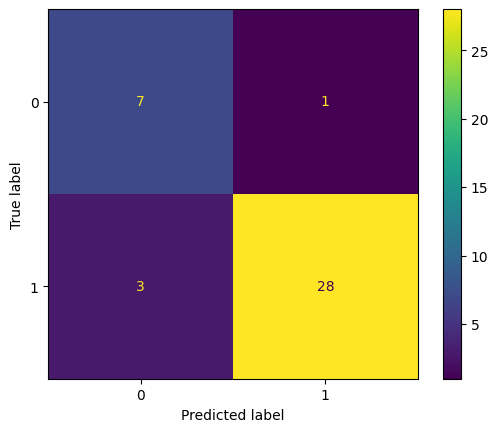

In [313]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
cm= confusion_matrix(Y_test, X_test_prediction)
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test)
plt.show()


In [314]:
precision = cm[1][1] / (cm[1][1] + cm[0][1])
print(precision)

0.9655172413793104


In [315]:
recall= cm[1][1] / (cm[1][1] + cm[1][0])
print(recall)

0.9032258064516129


Random Forest with PCA

In [316]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_PCA, Y_train)
X_test_prediction = classifier.predict(X_test_PCA)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

0.8974358974358975


# Decision Tree

In [317]:
# Fitting Decision Tree Model on Data
decision_parkinson_classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 0)
decision_parkinson_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [318]:
# Predicting Values on Test Set
Y_predicted = decision_parkinson_classifier.predict(X_test)

In [319]:
decision_accuracy = accuracy_score(Y_test, Y_predicted)
print(decision_accuracy)

0.8974358974358975


In [320]:
confusion_matrix(Y_test,Y_predicted)

array([[ 7,  1],
       [ 3, 28]], dtype=int64)

# Decision Tree after PCA

In [321]:
from sklearn.tree import DecisionTreeClassifier

In [322]:
decision_parkinson_classifier_PCA = DecisionTreeClassifier(max_leaf_nodes = 5, random_state = 0)
decision_parkinson_classifier_PCA.fit(X_PCA, Y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

In [323]:
Y_predicted_PCA = decision_parkinson_classifier_PCA.predict(X_test_PCA)

In [324]:
decision_accuracy_PCA = accuracy_score(Y_test, Y_predicted_PCA)
print(decision_accuracy_PCA)

0.7948717948717948
